# Práctica: Dataset vinos, introducción al algoritmo K-Nearest Neighbors (K-NN) con Scikit-learn

- Leer detenidamente los comentarios y el código y completar los puntos que se proponen, consulta los cuadernos anteriores que hemos visto en clase.
- Una vez completes los 5 primeros puntos realiza los ejercicios adicionales del punto 6.



## 1. Configuración inicial

Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn')

# Configuración para visualizaciones más atractivas

############################################################
# TODO
# - Imprime los estilos de matplotlib disponibles
# - Imprime las paletas de seaborn disponibles
# - Escoge un estilo y una paleta
############################################################

print(plt.style.available)
print(sns.palettes.SEABORN_PALETTES)

plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB48

## 2. Carga y exploración de datos

El dataset de vinos (wine dataset) contiene datos de análisis químicos de vinos de tres cultivos diferentes.

In [ ]:

############################################################
# TODO
############################################################
# Cargar el dataset
# Asigna las categorías
wine = load_wine()
X = wine.data
y = wine.target

# Se convierte el dataset a un dataframe de pandas
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target

# Explorar los datos
print("Dimensiones del dataset:", X.shape)
print("\nCaracterísticas disponibles:")
for feature in wine.feature_names:
    print(f"- {feature}")

print("\nEstadísticas descriptivas:")
print(wine_df.describe())

Dimensiones del dataset: (178, 13)

Características disponibles:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

Estadísticas descriptivas:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flav

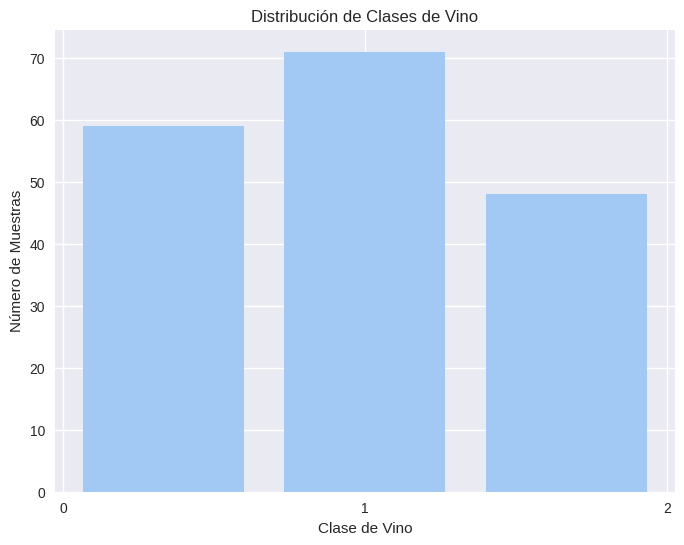

In [ ]:
# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
plt.hist(y, bins=3, rwidth=0.8)
plt.title('Distribución de Clases de Vino')
plt.xlabel('Clase de Vino')
plt.ylabel('Número de Muestras')
plt.xticks([0, 1, 2])
plt.show()

## 3. Preparación de datos

### 3.1 División del dataset

In [ ]:
############################################################
# TODO
############################################################

# divide los datos utilizando train_test_split y con un porcentaje datos de pruebas del 25%.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
    )

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (133, 13)
Tamaño del conjunto de prueba: (45, 13)


### 3.2 Normalización
La normalización es crucial para K-NN porque el algoritmo se basa en distancias.

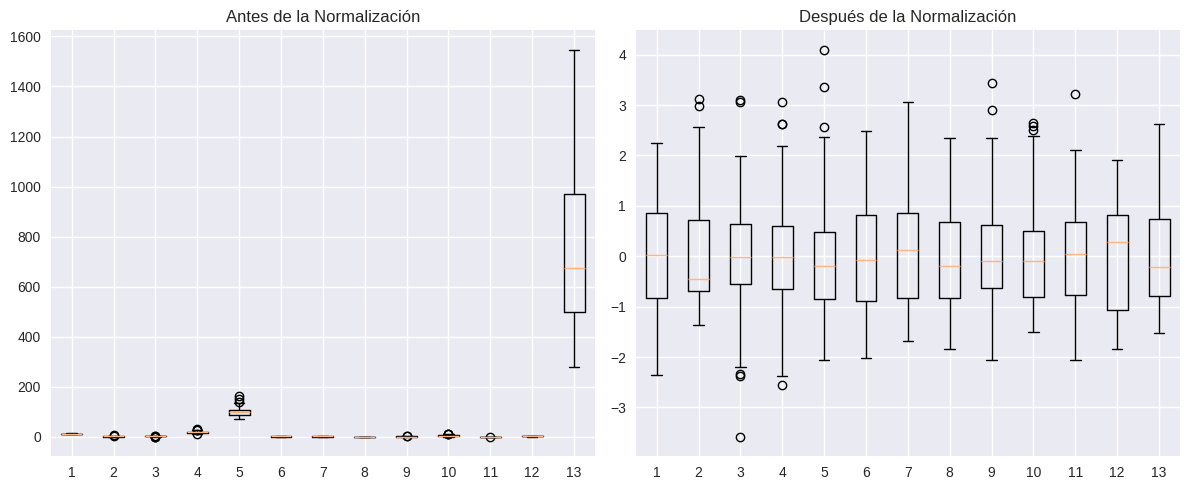

In [ ]:
############################################################
# TODO
############################################################
# Inicializa la clase para hacer un escalado estándar
# Escala los datos de entrenamiento
# Escala los datos de prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualizar el efecto de la normalización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Antes de la Normalización')
plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled)
plt.title('Después de la Normalización')
plt.tight_layout()
plt.show()

## 4. Implementación del modelo K-NN

### 4.1 Encontrar el mejor valor de k

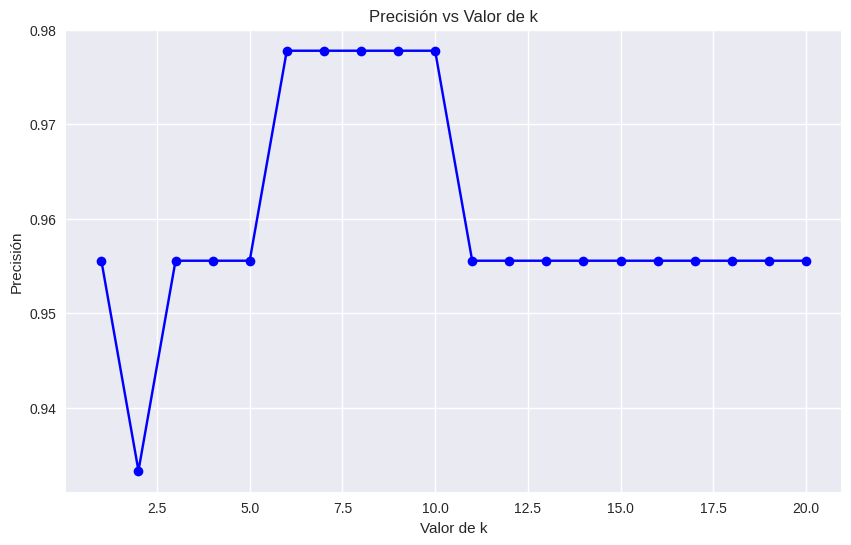

Mejor valor de k encontrado: 6


In [ ]:
k_values = range(1, 21)
scores = []

for k in k_values:
    ############################################################
    # TODO
    ############################################################
    # crea un clasificador k-NN de sklearn
    # Ajusta el modelo con los datos de entrenamiento y de prueba

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, 'bo-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs Valor de k')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(scores)]
print(f"Mejor valor de k encontrado: {best_k}")

### 4.2 Entrenamiento del modelo final

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

## 5. Evaluación del modelo

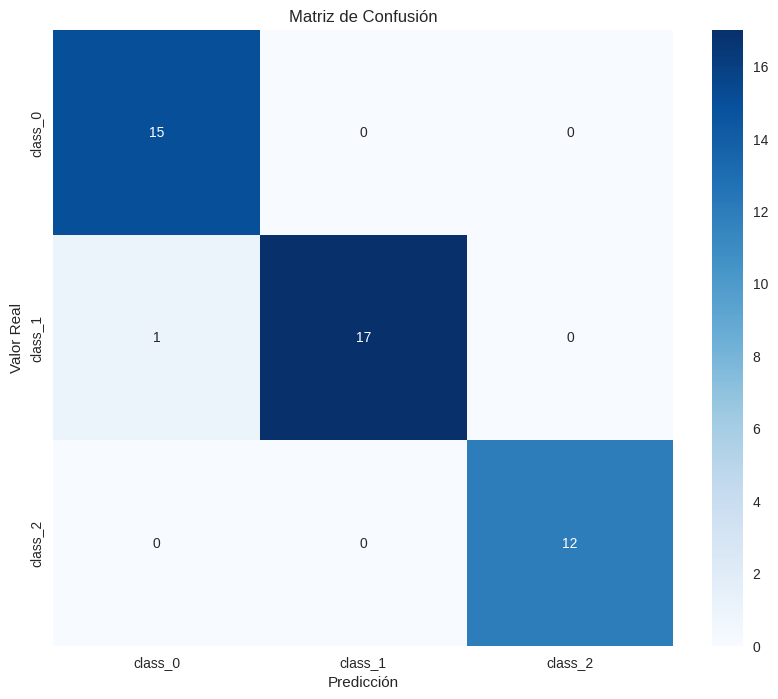


Informe de clasificación:
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        15
     class_1       1.00      0.94      0.97        18
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
y_pred = knn_final.predict(X_test_scaled)

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Métricas detalladas
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

## 6. Más ejercicios prácticos

### Ejercicio 1: Visualización de características
Completa el siguiente código para crear un scatter plot de dos características a tu elección:

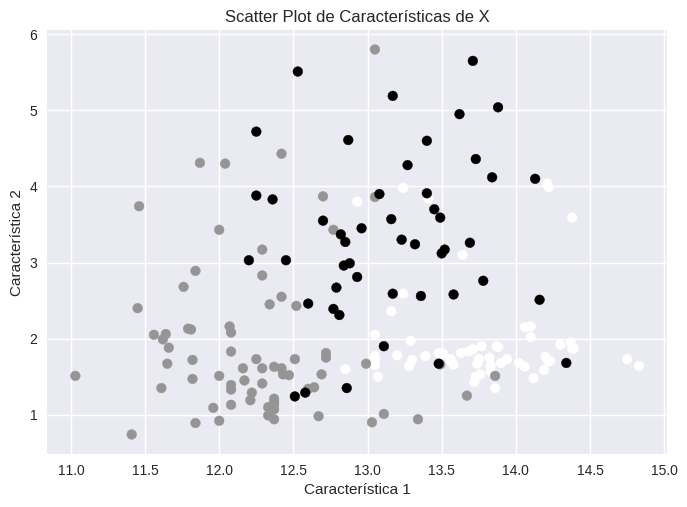

In [ ]:
# Tu código aquí
# Pista: usa plt.scatter() y elige dos columnas de X
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Scatter Plot de Características de X')
plt.show()

### Ejercicio 2: Experimenta con distancias
Modifica el modelo para usar diferentes métricas de distancia (manhattan, euclideana, etc., las que quieras) y compara los resultados:

In [ ]:
# Tu código aquí
# Pista: usa el parámetro metric de KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

results = {}

# entrenamiento y evaluación con diferentes métricas
for metric in distance_metrics:
    # entrenar el modelo KNN con la métrica específica
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)

    # predicciones sobre los datos de prueba
    y_pred = knn.predict(X_test_scaled)

    # precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

# comparacion los resultados obtenidos
print("\nResumen de resultados:")
for metric, accuracy in results.items():
    print(f"{metric}: {accuracy:.4f}")


Resumen de resultados:
euclidean: 0.9556
manhattan: 0.9556
chebyshev: 0.9556
minkowski: 0.9556


### Ejercicio 3: Validación Cruzada
Implementa validación cruzada para evaluar el modelo

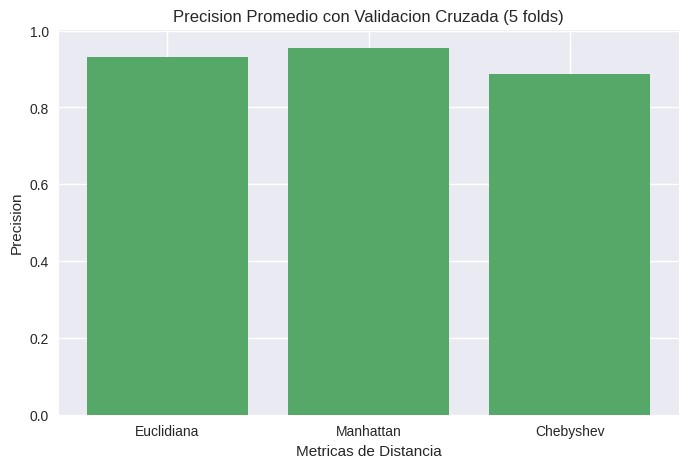

Euclidiana: Precisión Promedio=0.9325
Manhattan: Precisión Promedio=0.9547
Chebyshev: Precisión Promedio=0.8863


In [ ]:
# Tu código aquí
# Pista: investiga sklearn.model_selection.cross_val_score
from sklearn.model_selection import cross_val_score

metrics_cv = {
    'Euclidiana': {'metric': 'minkowski', 'p': 2},
    'Manhattan': {'metric': 'manhattan'},
    'Chebyshev': {'metric': 'chebyshev'}
}

cv_results = {}

for name, params in metrics_cv.items():
    knn = KNeighborsClassifier(n_neighbors=3, **params)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_results[name] = scores.mean()

plt.figure(figsize=(8, 5))
plt.bar(cv_results.keys(), cv_results.values(), color='#55A868')
plt.xlabel('Metricas de Distancia')
plt.title('Precision Promedio con Validacion Cruzada (5 folds)')
plt.ylabel('Precision')
plt.show()

for metric, accuracy in cv_results.items():
    print(f'{metric}: Precisión Promedio={accuracy:.4f}')

### Ejercicio 4: Predicción con nuevos datos

Documenta lo que hace el siguiente código, utiliza para ello comentarios de Python así como docstrings

In [19]:
""" La funcion predice el tipo de vino usando un modelo entrenado de k-NN y un escalador de datos """
def predict_wine_type(model, scaler, new_data):
    # Escala los nuevos datos utilizando el escalador ajustado
    new_data_scaled = scaler.transform(new_data)

    # Realiza la prediccion de las clases
    predictions = model.predict(new_data_scaled)

    # Obtiene las probabilidades de las clases
    probabilities = model.predict_proba(new_data_scaled)

    return predictions, probabilities

# sample_data = X_test.iloc[:3] Esta linea de codigo da error debido a que iloc es un metodo de pandas
"""
Para solucionarlo se podria convertir X_test a un DataFrame de pandas y luego
seleccionar las primeras 3 muestras con iloc

O bien seleccional las primeras 3 muestras utilizando un indice
que es lo que he echo abajo
"""
# Selecciona algunas muestras de prueba para la predicción
sample_data = X_test[:3] # en este caso las 3 primeras

# Llamada a la función para obtener las predicciones y probabilidades
predictions, probabilities = predict_wine_type(knn_final, scaler, sample_data)

# Muestra los resultados de la prediccion
print("Resultados de la predicción:")
# Itera sobre cada muestra de datos y muestra los resultados
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"\nMuestra {i+1}:")
    print(f"Clase predicha: {wine.target_names[pred]}") # Muestra el nombre de la clase
    print("Probabilidades por clase:")
    # Itera sobre las clases y sus probabilidades correspondientes
    for class_name, probability in zip(wine.target_names, prob):
        print(f"{class_name}: {probability:.3f}") # Muestra la probabilidad para cada clase

Resultados de la predicción:

Muestra 1:
Clase predicha: class_0
Probabilidades por clase:
class_0: 1.000
class_1: 0.000
class_2: 0.000

Muestra 2:
Clase predicha: class_0
Probabilidades por clase:
class_0: 1.000
class_1: 0.000
class_2: 0.000

Muestra 3:
Clase predicha: class_2
Probabilidades por clase:
class_0: 0.000
class_1: 0.000
class_2: 1.000
